# Session 13: Implicit Differentiation

This notebook explores implicit differentiation, a powerful technique for finding derivatives when y is not explicitly expressed as a function of x.

## Learning Objectives
- Understand the difference between explicit and implicit functions
- Master the technique of implicit differentiation
- Apply the chain rule in implicit contexts
- Solve the MIT video example: Folium of Descartes

## When to Use Implicit Differentiation

**Explicit functions**: $y = f(x)$ - y is directly expressed in terms of x
- Example: $y = x^2 + 3x + 1$

**Implicit functions**: $F(x,y) = 0$ - x and y are related by an equation
- Example: $x^2 + y^2 = 25$ (circle)
- Example: $y^3 + x^3 = 3xy$ (Folium of Descartes)

## The Technique
1. Differentiate both sides of the equation with respect to x
2. Remember that y is a function of x, so use the chain rule: $\frac{d}{dx}[y^n] = ny^{n-1}\frac{dy}{dx}$
3. Collect all terms with $\frac{dy}{dx}$ on one side
4. Factor out $\frac{dy}{dx}$ and solve

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import symbols, diff, solve, Eq, simplify
from scipy.optimize import fsolve

# MIT Video Example: Folium of Descartes
# Curve: y³ + x³ = 3xy
# Find slope at point (4/3, 2/3)

def solve_folium_implicit():
    """Solve the MIT video example using symbolic computation"""

    x, y = symbols('x y')

    # Define the curve equation
    equation = y**3 + x**3 - 3*x*y

    print("MIT Video Example: Folium of Descartes")
    print("Equation: y³ + x³ = 3xy")
    print("Find slope at point (4/3, 2/3)")
    print()

    # Verify the point is on the curve
    point_check = equation.subs([(x, sp.Rational(4,3)), (y, sp.Rational(2,3))])
    print(f"Verification: Point (4/3, 2/3) on curve: {point_check == 0}")
    print()

    # Step 1: Differentiate both sides implicitly
    print("Step 1: Differentiate both sides with respect to x")
    print("d/dx[y³ + x³] = d/dx[3xy]")

    # Left side: 3y²(dy/dx) + 3x²
    # Right side: 3y + 3x(dy/dx)
    dydx = symbols('dydx')  # Represent dy/dx as a symbol

    left_side = 3*y**2*dydx + 3*x**2
    right_side = 3*y + 3*x*dydx

    print(f"Left side: {left_side}")
    print(f"Right side: {right_side}")
    print()

    # Step 2: Solve for dy/dx
    print("Step 2: Collect dy/dx terms and solve")

    # Rearrange: (3y² - 3x)(dy/dx) = 3y - 3x²
    implicit_eq = Eq(left_side, right_side)
    dydx_solution = solve(implicit_eq, dydx)[0]

    print(f"dy/dx = {dydx_solution}")

    # Simplify
    dydx_simplified = simplify(dydx_solution)
    print(f"Simplified: dy/dx = {dydx_simplified}")
    print()

    # Step 3: Evaluate at the given point
    slope_at_point = dydx_simplified.subs([(x, sp.Rational(4,3)), (y, sp.Rational(2,3))])

    print("Step 3: Evaluate at point (4/3, 2/3)")
    print(f"dy/dx at (4/3, 2/3) = {slope_at_point}")
    print(f"Decimal value: {float(slope_at_point)}")

    return dydx_simplified, slope_at_point

derivative_formula, slope_value = solve_folium_implicit()

MIT Video Example: Folium of Descartes
Equation: y³ + x³ = 3xy
Find slope at point (4/3, 2/3)

Verification: Point (4/3, 2/3) on curve: True

Step 1: Differentiate both sides with respect to x
d/dx[y³ + x³] = d/dx[3xy]
Left side: 3*dydx*y**2 + 3*x**2
Right side: 3*dydx*x + 3*y

Step 2: Collect dy/dx terms and solve
dy/dx = (x**2 - y)/(x - y**2)
Simplified: dy/dx = (x**2 - y)/(x - y**2)

Step 3: Evaluate at point (4/3, 2/3)
dy/dx at (4/3, 2/3) = 5/4
Decimal value: 1.25


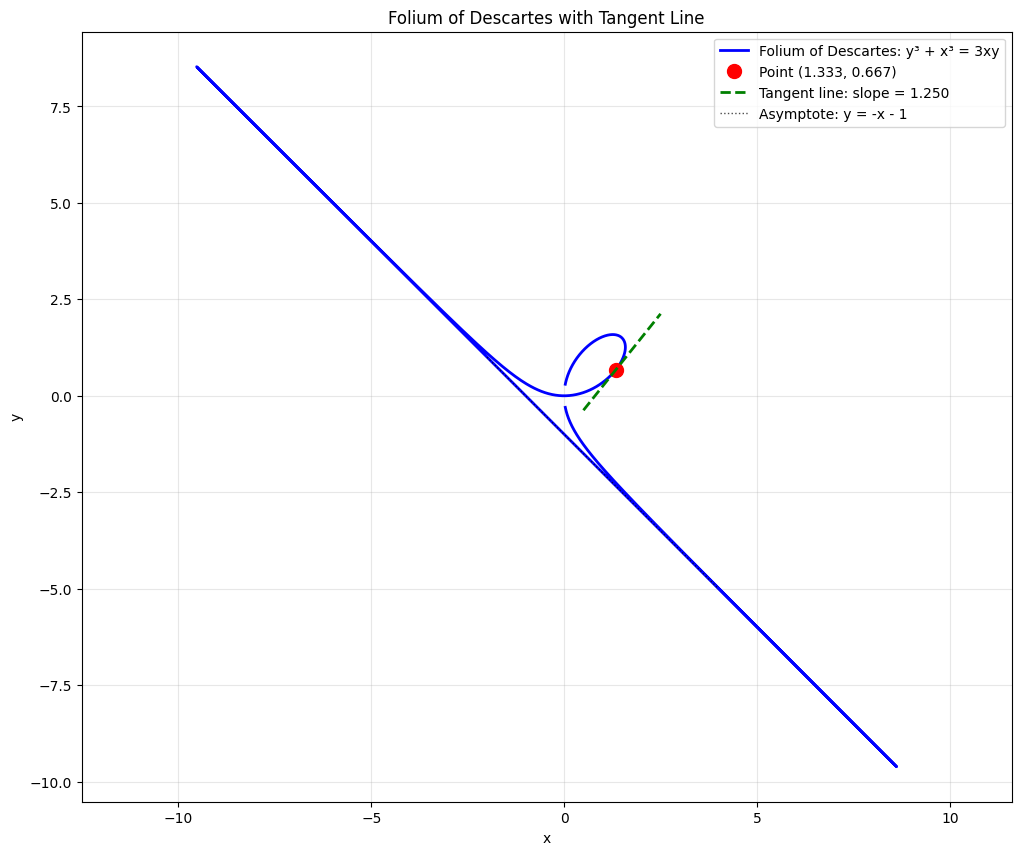

Manual Calculation Verification:
At point (4/3, 2/3):
Numerator: y - x² = 2/3 - (4/3)² = 2/3 - 16/9 = (6-16)/9 = -10/9
Denominator: y² - x = (2/3)² - 4/3 = 4/9 - 4/3 = (4-12)/9 = -8/9
dy/dx = (-10/9) / (-8/9) = 10/8 = 5/4 = 1.25


In [2]:
# Plot the Folium of Descartes and show the tangent line
def plot_folium():
    """Plot the Folium of Descartes curve"""

    # Parametric form of Folium: x = 3t/(1+t³), y = 3t²/(1+t³)
    t_vals = np.linspace(-10, 10, 2000)
    # Avoid t = -1 where denominator is zero
    t_vals = t_vals[np.abs(t_vals + 1) > 0.01]

    x_param = 3*t_vals / (1 + t_vals**3)
    y_param = 3*t_vals**2 / (1 + t_vals**3)

    # Filter out points that go to infinity
    valid_idx = (np.abs(x_param) < 10) & (np.abs(y_param) < 10)
    x_param = x_param[valid_idx]
    y_param = y_param[valid_idx]

    plt.figure(figsize=(12, 10))

    # Plot the curve
    plt.plot(x_param, y_param, 'b-', linewidth=2, label='Folium of Descartes: y³ + x³ = 3xy')

    # Mark the special point
    x_point, y_point = 4/3, 2/3
    plt.plot(x_point, y_point, 'ro', markersize=10, label=f'Point ({x_point:.3f}, {y_point:.3f})')

    # Draw tangent line at the point
    slope = float(slope_value)  # 5/4 = 1.25
    x_tangent = np.linspace(0.5, 2.5, 100)
    y_tangent = y_point + slope * (x_tangent - x_point)

    plt.plot(x_tangent, y_tangent, 'g--', linewidth=2,
             label=f'Tangent line: slope = {slope:.3f}')

    # Add asymptote y = -x - 1
    x_asymptote = np.linspace(-2, 4, 100)
    y_asymptote = -x_asymptote - 1
    plt.plot(x_asymptote, y_asymptote, 'k:', linewidth=1,
             label='Asymptote: y = -x - 1', alpha=0.7)

    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Folium of Descartes with Tangent Line')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.axis('equal')
    plt.show()

    # Show the manual calculation steps
    print("Manual Calculation Verification:")
    print(f"At point (4/3, 2/3):")
    print(f"Numerator: y - x² = 2/3 - (4/3)² = 2/3 - 16/9 = (6-16)/9 = -10/9")
    print(f"Denominator: y² - x = (2/3)² - 4/3 = 4/9 - 4/3 = (4-12)/9 = -8/9")
    print(f"dy/dx = (-10/9) / (-8/9) = 10/8 = 5/4 = 1.25")

plot_folium()

In [3]:
# Practice problems: Various implicit differentiation examples
def solve_implicit_examples():
    """Solve several implicit differentiation problems"""

    x, y = symbols('x y')

    examples = [
        ("Circle", x**2 + y**2 - 25, "x² + y² = 25"),
        ("Ellipse", x**2/4 + y**2/9 - 1, "x²/4 + y²/9 = 1"),
        ("Hyperbola", x**2 - y**2 - 1, "x² - y² = 1"),
        ("Astroid", x**(sp.Rational(2,3)) + y**(sp.Rational(2,3)) - 1, "x^(2/3) + y^(2/3) = 1"),
        ("Lemniscate", (x**2 + y**2)**2 - 2*(x**2 - y**2), "(x² + y²)² = 2(x² - y²)")
    ]

    print("Implicit Differentiation Examples:")
    print("=" * 40)

    for name, equation, description in examples:
        print(f"\n{name}: {description}")

        # Differentiate implicitly
        dydx = symbols('dydx')

        # Manual substitution method
        eq_diff = diff(equation, x) + diff(equation, y) * dydx

        try:
            # Solve for dy/dx
            solution = solve(eq_diff, dydx)
            if solution:
                result = solution[0]
                print(f"dy/dx = {result}")
            else:
                print("No solution found")
        except Exception as e:
            print(f"Error: {e}")

solve_implicit_examples()

Implicit Differentiation Examples:

Circle: x² + y² = 25
dy/dx = -x/y

Ellipse: x²/4 + y²/9 = 1
dy/dx = -9*x/(4*y)

Hyperbola: x² - y² = 1
dy/dx = x/y

Astroid: x^(2/3) + y^(2/3) = 1
dy/dx = -y**(1/3)/x**(1/3)

Lemniscate: (x² + y²)² = 2(x² - y²)
dy/dx = x*(-x**2 - y**2 + 1)/(y*(x**2 + y**2 + 1))


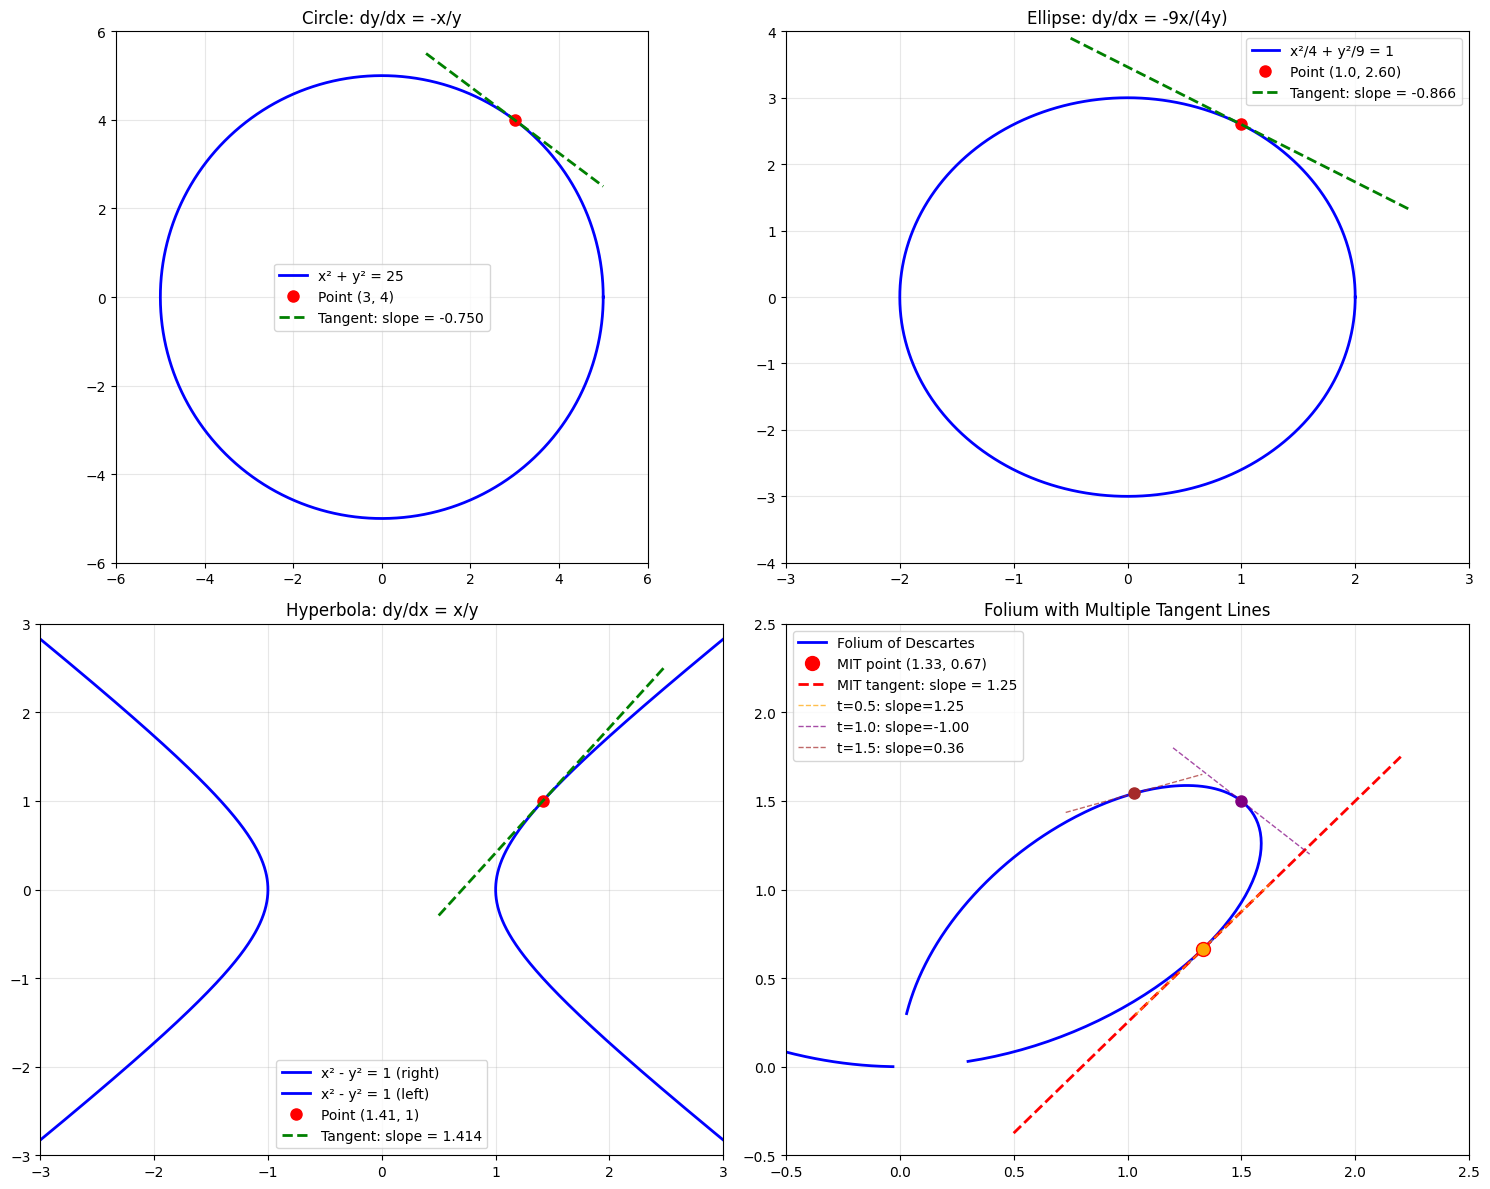

In [4]:
# Visualize multiple curves and their slopes
def plot_implicit_curves():
    """Plot various implicit curves with tangent information"""

    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # 1. Circle: x² + y² = 25
    theta = np.linspace(0, 2*np.pi, 1000)
    x_circle = 5 * np.cos(theta)
    y_circle = 5 * np.sin(theta)

    axes[0,0].plot(x_circle, y_circle, 'b-', linewidth=2, label='x² + y² = 25')

    # Show tangent at point (3, 4)
    x_pt, y_pt = 3, 4
    slope_circle = -x_pt/y_pt  # dy/dx = -x/y
    x_tang = np.linspace(1, 5, 100)
    y_tang = y_pt + slope_circle * (x_tang - x_pt)

    axes[0,0].plot(x_pt, y_pt, 'ro', markersize=8, label=f'Point ({x_pt}, {y_pt})')
    axes[0,0].plot(x_tang, y_tang, 'g--', linewidth=2,
                   label=f'Tangent: slope = {slope_circle:.3f}')

    axes[0,0].set_xlim(-6, 6)
    axes[0,0].set_ylim(-6, 6)
    axes[0,0].set_title('Circle: dy/dx = -x/y')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    axes[0,0].set_aspect('equal')

    # 2. Ellipse: x²/4 + y²/9 = 1
    x_ellipse = 2 * np.cos(theta)
    y_ellipse = 3 * np.sin(theta)

    axes[0,1].plot(x_ellipse, y_ellipse, 'b-', linewidth=2, label='x²/4 + y²/9 = 1')

    # Tangent at point (1, 3√3/2)
    x_pt2, y_pt2 = 1, 3*np.sqrt(3)/2
    slope_ellipse = -9*x_pt2/(4*y_pt2)  # dy/dx = -9x/(4y)
    x_tang2 = np.linspace(-0.5, 2.5, 100)
    y_tang2 = y_pt2 + slope_ellipse * (x_tang2 - x_pt2)

    axes[0,1].plot(x_pt2, y_pt2, 'ro', markersize=8, label=f'Point ({x_pt2:.1f}, {y_pt2:.2f})')
    axes[0,1].plot(x_tang2, y_tang2, 'g--', linewidth=2,
                   label=f'Tangent: slope = {slope_ellipse:.3f}')

    axes[0,1].set_xlim(-3, 3)
    axes[0,1].set_ylim(-4, 4)
    axes[0,1].set_title('Ellipse: dy/dx = -9x/(4y)')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)

    # 3. Hyperbola: x² - y² = 1
    t_hyp = np.linspace(-3, 3, 1000)
    x_hyp_pos = np.cosh(t_hyp)
    y_hyp_pos = np.sinh(t_hyp)
    x_hyp_neg = -np.cosh(t_hyp)
    y_hyp_neg = np.sinh(t_hyp)

    axes[1,0].plot(x_hyp_pos, y_hyp_pos, 'b-', linewidth=2, label='x² - y² = 1 (right)')
    axes[1,0].plot(x_hyp_neg, y_hyp_neg, 'b-', linewidth=2, label='x² - y² = 1 (left)')

    # Tangent at point (√2, 1)
    x_pt3, y_pt3 = np.sqrt(2), 1
    slope_hyperbola = x_pt3/y_pt3  # dy/dx = x/y
    x_tang3 = np.linspace(0.5, 2.5, 100)
    y_tang3 = y_pt3 + slope_hyperbola * (x_tang3 - x_pt3)

    axes[1,0].plot(x_pt3, y_pt3, 'ro', markersize=8, label=f'Point ({x_pt3:.2f}, {y_pt3})')
    axes[1,0].plot(x_tang3, y_tang3, 'g--', linewidth=2,
                   label=f'Tangent: slope = {slope_hyperbola:.3f}')

    axes[1,0].set_xlim(-3, 3)
    axes[1,0].set_ylim(-3, 3)
    axes[1,0].set_title('Hyperbola: dy/dx = x/y')
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)

    # 4. Folium of Descartes with multiple tangent lines
    # Use parametric form: x = 3t/(1+t³), y = 3t²/(1+t³)
    t_folium = np.linspace(0.1, 10, 500)
    x_folium = 3*t_folium / (1 + t_folium**3)
    y_folium = 3*t_folium**2 / (1 + t_folium**3)

    # Also include the lower part
    t_folium_neg = np.linspace(-0.99, -0.01, 500)
    x_folium_neg = 3*t_folium_neg / (1 + t_folium_neg**3)
    y_folium_neg = 3*t_folium_neg**2 / (1 + t_folium_neg**3)

    axes[1,1].plot(x_folium, y_folium, 'b-', linewidth=2, label='Folium of Descartes')
    axes[1,1].plot(x_folium_neg, y_folium_neg, 'b-', linewidth=2)

    # MIT point and tangent
    x_mit, y_mit = 4/3, 2/3
    slope_mit = 5/4
    x_tang_mit = np.linspace(0.5, 2.2, 100)
    y_tang_mit = y_mit + slope_mit * (x_tang_mit - x_mit)

    axes[1,1].plot(x_mit, y_mit, 'ro', markersize=10, label=f'MIT point ({x_mit:.2f}, {y_mit:.2f})')
    axes[1,1].plot(x_tang_mit, y_tang_mit, 'r--', linewidth=2,
                   label=f'MIT tangent: slope = {slope_mit}')

    # Add a few more tangent lines at different points
    test_t_values = [0.5, 1.0, 1.5]
    colors = ['orange', 'purple', 'brown']

    for i, t in enumerate(test_t_values):
        x_test = 3*t / (1 + t**3)
        y_test = 3*t**2 / (1 + t**3)

        # Calculate slope using our formula: dy/dx = (y - x²)/(y² - x)
        if y_test**2 - x_test != 0:  # Avoid division by zero
            slope_test = (y_test - x_test**2) / (y_test**2 - x_test)

            x_tang_test = np.linspace(x_test - 0.3, x_test + 0.3, 50)
            y_tang_test = y_test + slope_test * (x_tang_test - x_test)

            axes[1,1].plot(x_test, y_test, 'o', color=colors[i], markersize=8)
            axes[1,1].plot(x_tang_test, y_tang_test, '--', color=colors[i],
                          linewidth=1, alpha=0.7,
                          label=f't={t}: slope={slope_test:.2f}')

    axes[1,1].set_xlim(-0.5, 2.5)
    axes[1,1].set_ylim(-0.5, 2.5)
    axes[1,1].set_title('Folium with Multiple Tangent Lines')
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

plot_implicit_curves()

Second Derivative by Implicit Differentiation
Example: x² + y² = 25

First derivative: dy/dx = -x/y
Second derivative: d²y/dx² = (-x**2 - y**2)/y**3
Using x² + y² = 25: d²y/dx² = -25/y**3

Second derivatives at specific points:
At (3, 4): dy/dx = -0.750, d²y/dx² = -0.391
At (0, 5): dy/dx = 0.000, d²y/dx² = -0.200
At (4, 3): dy/dx = -1.333, d²y/dx² = -0.926
At (-3, -4): dy/dx = -0.750, d²y/dx² = 0.391


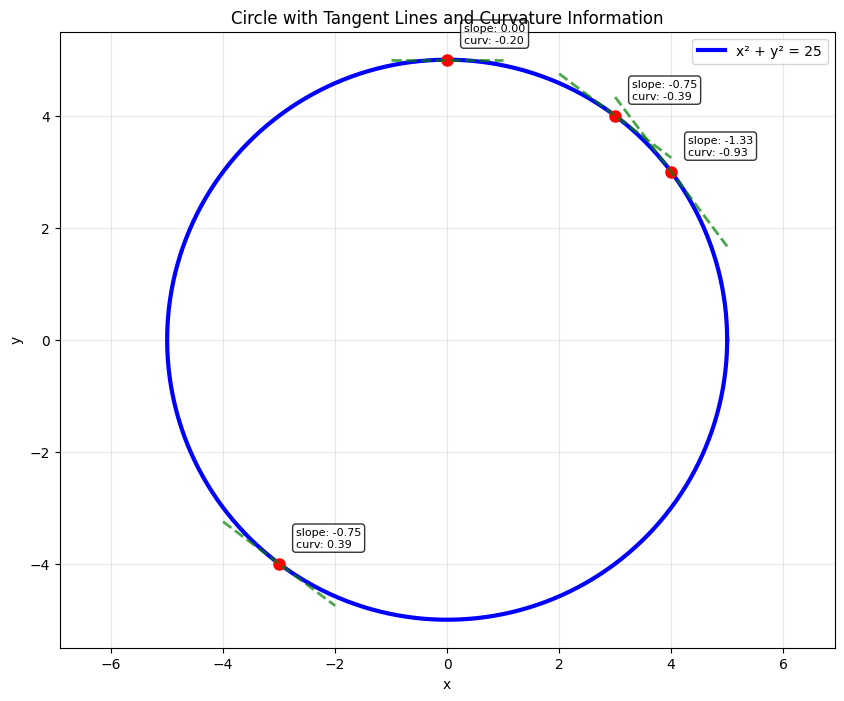

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff, simplify

def second_derivative_implicit():
    """Find second derivatives implicitly"""

    x, y = symbols('x y')

    print("Second Derivative by Implicit Differentiation")
    print("Example: x² + y² = 25\n")

    # First derivative: dy/dx = -x/y
    dydx_first = -x/y
    print(f"First derivative: dy/dx = {dydx_first}")

    # Second derivative
    d2ydx2 = diff(dydx_first, x) + diff(dydx_first, y) * dydx_first
    d2ydx2_simplified = simplify(d2ydx2)
    print(f"Second derivative: d²y/dx² = {d2ydx2_simplified}")

    # Substitute x² + y² = 25
    d2ydx2_circle = d2ydx2_simplified.subs(x**2 + y**2, 25)
    print(f"Using x² + y² = 25: d²y/dx² = {d2ydx2_circle}")

    # Evaluate at specific points
    points = [(3, 4), (0, 5), (4, 3), (-3, -4)]

    print("\nSecond derivatives at specific points:")
    for x_val, y_val in points:
        first_deriv = float(dydx_first.subs([(x, x_val), (y, y_val)]))
        second_deriv = float(d2ydx2_circle.subs(y, y_val))
        print(f"At ({x_val}, {y_val}): dy/dx = {first_deriv:.3f}, d²y/dx² = {second_deriv:.3f}")

    # Generate points for the circle
    theta = np.linspace(0, 2*np.pi, 400)
    x_circle = 5 * np.cos(theta)
    y_circle = 5 * np.sin(theta)

    # Plot
    plt.figure(figsize=(10, 8))
    plt.plot(x_circle, y_circle, 'b-', linewidth=3, label='x² + y² = 25')

    for x_val, y_val in points:
        plt.plot(x_val, y_val, 'ro', markersize=8)
        slope = -x_val/y_val
        second_deriv = -25/(y_val**3)
        delta = 1.0
        x_tang_seg = np.array([x_val - delta, x_val + delta])
        y_tang_seg = y_val + slope * (x_tang_seg - x_val)
        plt.plot(x_tang_seg, y_tang_seg, 'g--', alpha=0.7, linewidth=2)
        plt.text(x_val + 0.3, y_val + 0.3,
                 f"slope: {slope:.2f}\ncurv: {second_deriv:.2f}",
                 fontsize=8, bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

    plt.xlim(-6, 6)
    plt.ylim(-6, 6)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Circle with Tangent Lines and Curvature Information')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.axis('equal')
    plt.show()

second_derivative_implicit()
